In [2]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Flatten, Dense, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image, display

Using TensorFlow backend.


In [3]:
batch_size = 32
epochs = 50

classes = ['gun', 'money', 'ticket']
nb_classes = len(classes)

img_rows = 100
img_cols = 100
channels = 3

train_data_dir = './data/train'
validation_data_dir = './data/validation'

result_dir = './results'

In [4]:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [5]:
input_tensor = Input(shape=(img_rows,img_cols, channels))
base_model = VGG16(weights='imagenet', input_tensor=input_tensor, include_top=False)

In [6]:
base_model.summary()
#include_topをfalseとすると最終的な出力層に近い部分を除くことができる

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [7]:
x = base_model.output

In [8]:
x = Flatten(input_shape=base_model.output_shape[1:])(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(nb_classes, activation="softmax")(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [10]:
for layer in model.layers[:15]:
    layer.trainable = False

In [11]:
model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
             metrics=["accuracy"])

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2, #シーア変換
    zoom_range = 0.2, #ランダムにズーム
    rotation_range = 5, #ランダムに回転
    horizontal_flip = True #水平方向に反転
    
)

In [13]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode = 'rgb',
    classes = classes,
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = True
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    color_mode = 'rgb',
    classes = classes,
    class_mode = "categorical",
    batch_size = batch_size,
    shuffle = True
)

Found 881 images belonging to 3 classes.
Found 111 images belonging to 3 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size
)

Epoch 1/50
27/27 [==============================] - 146s 5s/step - loss: 1.1242 - acc: 0.4609 - val_loss: 0.9080 - val_acc: 0.6250
Epoch 2/50
27/27 [==============================] - 215s 8s/step - loss: 0.8249 - acc: 0.6324 - val_loss: 0.6491 - val_acc: 0.7292
Epoch 3/50
27/27 [==============================] - 172s 6s/step - loss: 0.6056 - acc: 0.7593 - val_loss: 0.4520 - val_acc: 0.8333
Epoch 4/50
27/27 [==============================] - 164s 6s/step - loss: 0.5307 - acc: 0.8060 - val_loss: 0.3414 - val_acc: 0.9062
Epoch 5/50
27/27 [==============================] - 167s 6s/step - loss: 0.4377 - acc: 0.8409 - val_loss: 0.2985 - val_acc: 0.9062
Epoch 6/50
27/27 [==============================] - 165s 6s/step - loss: 0.3908 - acc: 0.8484 - val_loss: 0.2576 - val_acc: 0.9271
Epoch 7/50
27/27 [==============================] - 157s 6s/step - loss: 0.3619 - acc: 0.8616 - val_loss: 0.2317 - val_acc: 0.9375
Epoch 8/50
27/27 [==============================] - 160s 6s/step - loss: 0.3396 - a

In [16]:
train_generator.samples

881

In [17]:
history.history

{'acc': [0.46171967030554412,
  0.6301531216000219,
  0.7592592592592593,
  0.80565371045796697,
  0.84052757829499192,
  0.84837962962962965,
  0.86091127126908706,
  0.88103651375596459,
  0.88574793889188375,
  0.88078703703703709,
  0.89752650183699012,
  0.88968824975782157,
  0.9155092592592593,
  0.91486810580146116,
  0.92108362786761444,
  0.90625,
  0.94464075389823865,
  0.91990577156608322,
  0.91366906496260658,
  0.92245370370370372,
  0.93875147232037692,
  0.9124700241952205,
  0.9340400472546635,
  0.9282407407407407,
  0.92461719691261945,
  0.94699646643109536,
  0.93521790341578326,
  0.94346289766691316,
  0.94817432287303804,
  0.93757361608905143,
  0.93639575978752021,
  0.94346289752650181,
  0.94228504122497059,
  0.94560185185185186,
  0.95923261398034132,
  0.95833333333333337,
  0.9520383694474932,
  0.95759717314487636,
  0.95023148148148151,
  0.95443645098226537,
  0.94464075382803303,
  0.94328703703703709,
  0.96702002355712602,
  0.96282973628249957,


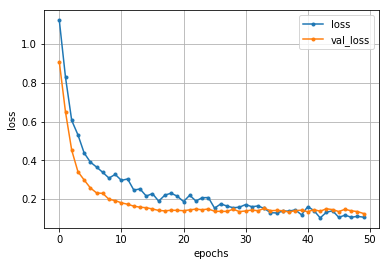

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(epochs), loss, marker='.', label="loss")
plt.plot(range(epochs), val_loss, marker='.', label="val_loss")
plt.legend(loc="best")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


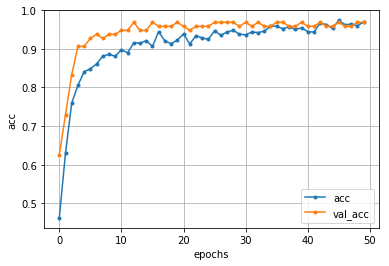

In [19]:
loss = history.history['acc']
val_loss = history.history['val_acc']

plt.plot(range(epochs), loss, marker='.', label="acc")
plt.plot(range(epochs), val_loss, marker='.', label="val_acc")
plt.legend(loc="best")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()


In [20]:
import pickle

In [25]:
with open('./results/history.pkl', mode='wb') as f:
    pickle.dump(history.history, f)

In [26]:
model.save('./results/vgg16-finetuning.h5')

In [27]:
def predict(img_file_path):
    display(Image(img_file_path, width=150, unconfined=True))
    img = image.load_img(img_file_path, target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    x = x/255.0
    
    pred = model.predict(x)[0]
    
    top = 5
    
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    for x in result:
        print(x)

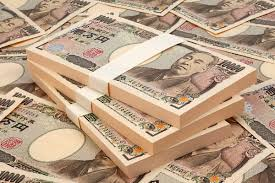

('money', 0.87891597)
('ticket', 0.12008144)
('gun', 0.0010026265)


In [29]:
predict('./data/sample/money_sample.jpg')

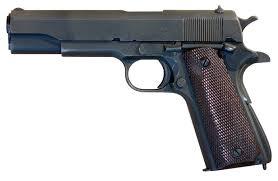

('gun', 0.99987602)
('money', 7.5886564e-05)
('ticket', 4.8033351e-05)


In [31]:
predict('./data/sample/gun_sample.jpg')

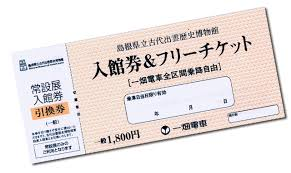

('ticket', 0.99871337)
('money', 0.0012798607)
('gun', 6.8097784e-06)


In [32]:
predict('./data/sample/ticket_sample.jpg')